In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import timedelta

In [301]:
df1 = pd.read_csv('../data/data_casal_montserratina/Casal_Montserratina_202201_202206.csv', delimiter=';')
df2 = pd.read_csv('../data/data_casal_montserratina/Casal_Montserratina_202207_202212.csv', delimiter=';')
df3 = pd.read_csv('../data/data_casal_montserratina/Casal_Montserratina_202301_202306.csv', delimiter=';')
df4 = pd.read_csv('../data/data_casal_montserratina/Casal_Montserratina_202307_202312.csv', delimiter=';')
df5 = pd.read_csv('../data/data_casal_montserratina/Casal_Montserratina_202401_202405.csv', delimiter=';')
df = pd.concat([df1, df2, df3, df4, df5], axis=0)
df

TimeStamp  Valor  Període tarifari Tipus lectura
0     01/01/2022 00:00      6                 6          Real
1     01/01/2022 01:00      6                 6          Real
2     01/01/2022 02:00      5                 6          Real
3     01/01/2022 03:00      7                 6          Real
4     01/01/2022 04:00      7                 6          Real
...                ...    ...               ...           ...
1363  07/05/2024 19:00     10                 4          Real
1364  07/05/2024 20:00      7                 4          Real
1365  07/05/2024 21:00      4                 4          Real
1366  07/05/2024 22:00      2                 5          Real
1367  07/05/2024 23:00      2                 5          Real

[17688 rows x 4 columns]

In [302]:
df = df.rename(columns={'TimeStamp': 'Date', 'Valor':'Demand'})
df = df.drop(columns=["Període tarifari", "Tipus lectura"], axis=1)
df["Date"] = pd.to_datetime(df["Date"], format='%d/%m/%Y %H:%M')
df.set_index("Date", inplace=True)
df

Demand
Date                       
2022-01-01 00:00:00       6
2022-01-01 01:00:00       6
2022-01-01 02:00:00       5
2022-01-01 03:00:00       7
2022-01-01 04:00:00       7
...                     ...
2024-05-07 19:00:00      10
2024-05-07 20:00:00       7
2024-05-07 21:00:00       4
2024-05-07 22:00:00       2
2024-05-07 23:00:00       2

[17688 rows x 1 columns]

In [303]:
# Weekly Demand Plot
whole_df_1w = df.resample('1W').mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=whole_df_1w.index, y=whole_df_1w["Demand"], mode='lines'))
fig.update_layout(
    title = "Weekly Energy Demand",
    xaxis_title = "Date",
    yaxis_title = "Demand (MWh)",
    width = 850,
    height = 400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

In [308]:
import calendar
from plotly.subplots import make_subplots
def plot_monthly_demand(df):
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)
    
    groups = df.groupby([df.index.year, df.index.month])
    num_plots = len(groups)
    rows = (num_plots + 1) // 2
    fig = make_subplots(rows=rows, cols=2, subplot_titles=[f"Energy Demand for {calendar.month_name[month]}-{year}" for (year, month) in groups.keys()])
    for i, ((year, month), group) in enumerate(groups):
        row = i // 2 + 1
        col = i % 2 + 1
        fig.add_trace(go.Scatter(x = group.index, y=group["Demand"]))
        fig.add_trace(go.Scatter(x=group.index, y=group["Demand"], mode='lines'))
        fig.update_layout(
            title = {
                "text": f"Energy Demand for {calendar.month_name[month]}-{year}",
                'x': 0.5,
                'xanchor': 'center'
            },
            xaxis_title="Date",
            yaxis_title="Demand (kWh)",
            width=850,
            height=400,
            margin=dict(l=20, r=20, t=45, b=20),
            legend=dict(
                orientation="h",
                yanchor="top",
                y=1,
                xanchor="left",
                x=0.001
            )
        )
        fig.show()
plot_monthly_demand(df)

In [ ]:
def plot_temp_vs_demand(df):
    if not pd.api.types.is_datetime64_any_dtype(df.index):
        df.index = pd.to_datetime(df.index)

### Missing Values

In [ ]:
def checkMissingData(df):
    min_date = df.index.min()
    max_date = df.index.max()

    date_range = pd.date_range(start=min_date, end=max_date, freq='h')
    missing_dates = date_range[~date_range.isin(df.index)]
    print(f"Number of Missing Values: {missing_dates.shape[0]}")
    return None if missing_dates.shape[0] == 0 else missing_dates, date_range
missing_dates, date_range = checkMissingData(df)

Number of Missing Values: 2906


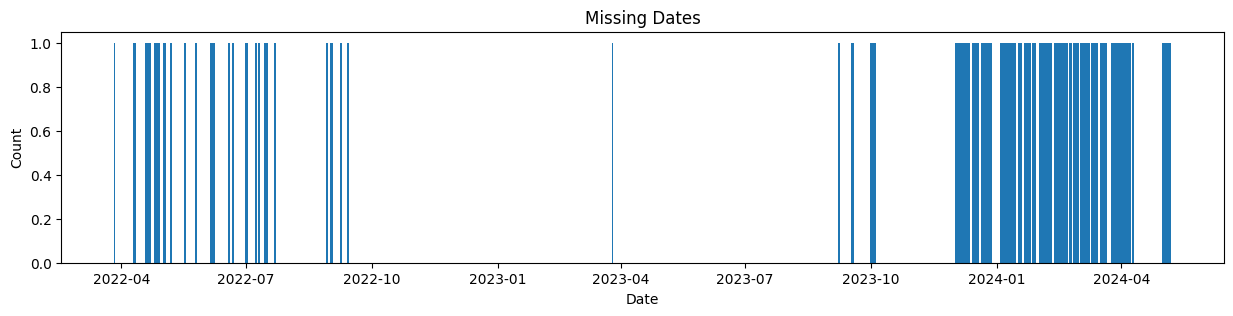

In [ ]:
plt.figure(figsize=(15, 3))
plt.bar(missing_dates, [1] * len(missing_dates))
plt.title("Missing Dates")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [ ]:
df = df[~df.index.duplicated(keep='first')]

In [ ]:
min_date = df.index.min()
max_date = df.index.max()
date_range = pd.date_range(start=min_date, end=max_date, freq='h')
df = df.reindex(date_range)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,  
    y=df['Demand'], 
    mode='lines', 
    name='Line'  
))

# Layout parameters
fig.update_layout(
    title='Demanda Eléctrico Casal La Monserratina',  
    xaxis_title='Consumo [kW]', 
    yaxis_title='',  
    xaxis_tickangle=0, 
    showlegend=False,     
)

In [ ]:
df = df.loc[(df.index >= pd.to_datetime('2022-01-07 0:00', format='%Y-%d-%m %H:%M'))]
df = df.loc[(df.index <= pd.to_datetime('2023-01-11 0:00', format='%Y-%d-%m %H:%M'))]
print(df["Demand"].isna().sum())

df["Demand"].interpolate(method="time", limit=7, inplace=True)
#df["Demand"].fillna(2, inplace=True)
df.dropna(inplace=True)
print(f"Nan: {df["Demand"].isna().sum()}")

361
Nan: 0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.index,  
    y=df['Demand'], 
    mode='lines', 
    name='Line'  
))

# Layout parameters
fig.update_layout(
    title='Demanda Eléctrico Casal La Monserratina',  
    xaxis_title='Consumo [kW]', 
    yaxis_title='',  
    xaxis_tickangle=0, 
    showlegend=False,     
)

In [ ]:
df = df.reset_index()
df.rename(columns={'index': 'Date'}, inplace=True)

In [ ]:
# Load the DataFrame from the pickle file
df.set_index("Date", inplace=True)
df = df.resample('15min').interpolate(method='time')
df.reset_index(inplace=True)
df_PV = pd.read_pickle("../data/data_casal_montserratina/LaMonserratina_weather_&_PV_2022_2023.pkl")
df_PV.rename(columns={"timestamp_local": "Date"}, inplace=True)
#df_PV.set_index("Date", inplace=True)
df_PV.head(3)


Date  pres [mb]  slp [mb]  wind_dir [m/s]  \
0 2022-01-01 00:00:00     1027.0    1028.0           360.0   
1 2022-01-01 00:15:00     1027.0    1028.0           357.5   
2 2022-01-01 00:30:00     1027.0    1028.0           355.0   

   wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  app_temp [C]  rh [%]  \
0                  4.0             1.0      10.7          10.7    92.0   
1                  4.1             1.4      10.7          10.7    91.0   
2                  4.2             1.8      10.7          10.7    90.0   

   dewpt [C]  ...   PV  Temp interna Modulo [C]  PV Wh  Year  Month  Hour  \
0      9.500  ...  0.0                22.066196    0.0  2022      1     0   
1      9.325  ...  0.0                22.066196    0.0  2022      1     0   
2      9.150  ...  0.0                22.066196    0.0  2022      1     0   

   DayOfWeek  DayOfYear  Day  Minute  
0          5          1    1       0  
1          5          1    1      15  
2          5          1    1      30  

[3 rows x 31 columns]

In [ ]:
df = df_PV.merge(df, how="inner", on=["Date", "Date"])
df.set_index("Date", inplace=True)
#df = df.resample('1h').interpolate(method='time')
df.reset_index(inplace=True)
df.rename(columns={'Demand': 'Consumo_red [kW]'}, inplace=True)

df["PV [kW]"] = (df["PV"]/1000000).round(3)
df.drop(columns=["PV"], inplace=True)
df["Consumo_total [kW]"] = df["Consumo_red [kW]"] + df["PV [kW]"]
df.drop(columns=["Consumo_red [kW]"], inplace=True)
df.rename(columns={'Consumo_total [kW]': 'Demand'}, inplace=True)
df

Date  pres [mb]  slp [mb]  wind_dir [m/s]  \
0     2022-07-02 00:00:00     1019.0    1020.0          150.00   
1     2022-07-02 00:15:00     1019.0    1020.0          192.50   
2     2022-07-02 00:30:00     1019.0    1020.0          235.00   
3     2022-07-02 00:45:00     1019.0    1020.0          277.50   
4     2022-07-02 01:00:00     1019.0    1020.0          320.00   
...                   ...        ...       ...             ...   
46748 2023-10-31 23:00:00     1014.0    1015.0          315.00   
46749 2023-10-31 23:15:00     1014.0    1015.0          318.75   
46750 2023-10-31 23:30:00     1014.0    1015.0          322.50   
46751 2023-10-31 23:45:00     1014.0    1015.0          326.25   
46752 2023-11-01 00:00:00     1014.0    1015.0          330.00   

       wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  app_temp [C]  rh [%]  \
0                      2.8            1.50    23.100        23.000   59.00   
1                      2.6            1.50    22.825        22.725   60.25   
2                      2.4            1.50    22.550        22.450   61.50   
3                      2.2            1.50    22.275        22.175   62.75   
4                      2.0            1.50    22.000        21.900   64.00   
...                    ...             ...       ...           ...     ...   
46748                  5.6            3.60    14.200        14.200   61.00   
46749                  5.5            2.95    13.950        13.950   62.25   
46750                  5.4            2.30    13.700        13.700   63.50   
46751                  5.3            1.65    13.450        13.450   64.75   
46752                  5.2            1.00    13.200        13.200   66.00   

       dewpt [C]  ...  PV Wh  Year  Month  Hour  DayOfWeek  DayOfYear  Day  \
0          14.70  ...    0.0  2022      7     0          5        183    2   
1          14.75  ...    0.0  2022      7     0          5        183    2   
2          14.80  ...    0.0  2022      7     0          5        183    2   
3          14.85  ...    0.0  2022      7     0          5        183    2   
4          14.90  ...    0.0  2022      7     1          5        183    2   
...          ...  ...    ...   ...    ...   ...        ...        ...  ...   
46748       6.80  ...    0.0  2023     10    23          1        304   31   
46749       6.85  ...    0.0  2023     10    23          1        304   31   
46750       6.90  ...    0.0  2023     10    23          1        304   31   
46751       6.95  ...    0.0  2023     10    23          1        304   31   
46752       7.00  ...    0.0  2023     11     0          2        305    1   

       Minute  PV [kW]  Demand  
0           0      0.0    3.00  
1          15      0.0    2.75  
2          30      0.0    2.50  
3          45      0.0    2.25  
4           0      0.0    2.00  
...       ...      ...     ...  
46748       0      0.0    2.00  
46749      15      0.0    2.25  
46750      30      0.0    2.50  
46751      45      0.0    2.75  
46752       0      0.0    3.00  

[46753 rows x 32 columns]

In [ ]:
df.describe()["Demand"]

count    46753.000000
mean         6.146578
min          0.000000
25%          2.500000
50%          4.387000
75%          6.848000
max         55.696000
std          6.066826
Name: Demand, dtype: float64

In [ ]:
def cyclical_encoding(df, cycle_length_list, columns):
    for col, cycle_length in zip(columns, cycle_length_list):
        if df[col].min == 0:
            df[f"{col}_sin"] = np.sin((df[col] / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos((df[col] / cycle_length) * np.pi * 2).round(4)
        else:
            df[f"{col}_sin"] = np.sin(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
            df[f"{col}_cos"] = np.cos(((df[col] - 1) / cycle_length) * np.pi * 2).round(4)
    return df

In [ ]:
def addNLags(df, lags=1):
    lag_df= df.copy()
    for i in range(1, lags + 1):
        lag_df[f'lag_{i}'] = lag_df["Demand"].shift(i * 24).fillna(0)

    return lag_df.fillna(0)

In [ ]:
df2 = df.copy()

#Add isWeekend Column based in DayOfTheWeek Value
df2["isWeekend"] = df2["DayOfWeek"].isin([5, 6])

cycle_lengths = [24, 7, 12, 365]
cols = ["Hour", "DayOfWeek", "Month", "DayOfYear"]

df2 = cyclical_encoding(df2, cycle_lengths, cols)

df2 = addNLags(df2, 14)
#df2["Demand_7d"] = df2["Demand"].shift(7 * 96).fillna(0).dropna()

df2

Date  pres [mb]  slp [mb]  wind_dir [m/s]  \
0     2022-07-02 00:00:00     1019.0    1020.0          150.00   
1     2022-07-02 00:15:00     1019.0    1020.0          192.50   
2     2022-07-02 00:30:00     1019.0    1020.0          235.00   
3     2022-07-02 00:45:00     1019.0    1020.0          277.50   
4     2022-07-02 01:00:00     1019.0    1020.0          320.00   
...                   ...        ...       ...             ...   
46748 2023-10-31 23:00:00     1014.0    1015.0          315.00   
46749 2023-10-31 23:15:00     1014.0    1015.0          318.75   
46750 2023-10-31 23:30:00     1014.0    1015.0          322.50   
46751 2023-10-31 23:45:00     1014.0    1015.0          326.25   
46752 2023-11-01 00:00:00     1014.0    1015.0          330.00   

       wind_gust_spd [m/s]  wind_spd [m/s]  temp [C]  app_temp [C]  rh [%]  \
0                      2.8            1.50    23.100        23.000   59.00   
1                      2.6            1.50    22.825        22.725   60.25   
2                      2.4            1.50    22.550        22.450   61.50   
3                      2.2            1.50    22.275        22.175   62.75   
4                      2.0            1.50    22.000        21.900   64.00   
...                    ...             ...       ...           ...     ...   
46748                  5.6            3.60    14.200        14.200   61.00   
46749                  5.5            2.95    13.950        13.950   62.25   
46750                  5.4            2.30    13.700        13.700   63.50   
46751                  5.3            1.65    13.450        13.450   64.75   
46752                  5.2            1.00    13.200        13.200   66.00   

       dewpt [C]  ...   lag_5  lag_6  lag_7  lag_8  lag_9  lag_10  lag_11  \
0          14.70  ...   0.000  0.000   0.00    0.0  0.000   0.000     0.0   
1          14.75  ...   0.000  0.000   0.00    0.0  0.000   0.000     0.0   
2          14.80  ...   0.000  0.000   0.00    0.0  0.000   0.000     0.0   
3          14.85  ...   0.000  0.000   0.00    0.0  0.000   0.000     0.0   
4          14.90  ...   0.000  0.000   0.00    0.0  0.000   0.000     0.0   
...          ...  ...     ...    ...    ...    ...    ...     ...     ...   
46748       6.80  ...  10.324  4.221   2.00    2.0  4.361   4.187     2.0   
46749       6.85  ...  10.029  4.241   2.25    2.0  3.809   4.214     2.0   
46750       6.90  ...   9.709  4.262   2.50    2.0  3.231   4.241     2.0   
46751       6.95  ...   9.366  4.282   2.75    2.0  2.628   4.268     2.0   
46752       7.00  ...   9.000  4.302   3.00    2.0  2.000   4.295     2.0   

       lag_12  lag_13  lag_14  
0         0.0   0.000   0.000  
1         0.0   0.000   0.000  
2         0.0   0.000   0.000  
3         0.0   0.000   0.000  
4         0.0   0.000   0.000  
...       ...     ...     ...  
46748     2.0   7.486   3.935  
46749     2.0   8.226   3.997  
46750     2.0   8.958   4.059  
46751     2.0   9.684   4.119  
46752     2.0  10.402   4.179  

[46753 rows x 55 columns]

In [ ]:
import holidays
def generateHolidayVar(df):
    df["Reduced_Date"] = df["Date"].dt.date
    list_holidays = holidays.Spain(prov="CT", years=list(df["Year"].unique()))
    list_holidays_dates = np.array(list(list_holidays.keys()), dtype='datetime64')
    df["isHoliday"] = df["Reduced_Date"].isin(list_holidays_dates)
    df = df.drop('Reduced_Date', axis=1)
    return df

df2 = generateHolidayVar(df2)
df3 = df2.copy()
dates = df3["Date"]
df3 = df3.reset_index(drop=True)
df3.index

RangeIndex(start=0, stop=46753, step=1)

In [ ]:
df3 = df3.drop(columns=["Date", "Minute", "Temp interna Modulo", 'PV Wh', 'PV [kW]'], axis=1)
df3 = df3.rename(columns={'pres [mb]': 'pres', 'slp [mb]':'slp', 'wind_dir [m/s]': 'wind_dir', 'wind_gust_spd [m/s]': 'wind_gust_spd', 
    'wind_spd [m/s]': 'wind_spd', 'temp [C]': 'temp', 'app_temp [C]': 'app_temp', 'rh [%]': 'rh', 'dewpt [C]': 'dewpt','clouds [%]': 'clouds',
    'vis [Km]':'vis', 'precip [mm]': 'precip', 'dhi [W/m^2]': 'dhi', 'dni [W/m^2]': 'dni', 'ghi [W/m^2]': 'ghi', 'solar_rad [W/m^2]': 'solar_rad', 'uv [0-11+]': 'uv',
    'elev_angle [º]': 'elev_angle', 'azimuth [º]': 'az', 'Temp interna Modulo [C]': 'Temp interna Modulo'})
df3

pres     slp  wind_dir  wind_gust_spd  wind_spd    temp  app_temp  \
0      1019.0  1020.0    150.00            2.8      1.50  23.100    23.000   
1      1019.0  1020.0    192.50            2.6      1.50  22.825    22.725   
2      1019.0  1020.0    235.00            2.4      1.50  22.550    22.450   
3      1019.0  1020.0    277.50            2.2      1.50  22.275    22.175   
4      1019.0  1020.0    320.00            2.0      1.50  22.000    21.900   
...       ...     ...       ...            ...       ...     ...       ...   
46748  1014.0  1015.0    315.00            5.6      3.60  14.200    14.200   
46749  1014.0  1015.0    318.75            5.5      2.95  13.950    13.950   
46750  1014.0  1015.0    322.50            5.4      2.30  13.700    13.700   
46751  1014.0  1015.0    326.25            5.3      1.65  13.450    13.450   
46752  1014.0  1015.0    330.00            5.2      1.00  13.200    13.200   

          rh  dewpt  clouds  ...  lag_6  lag_7  lag_8  lag_9  lag_10  lag_11  \
0      59.00  14.70     0.0  ...  0.000   0.00    0.0  0.000   0.000     0.0   
1      60.25  14.75     0.0  ...  0.000   0.00    0.0  0.000   0.000     0.0   
2      61.50  14.80     0.0  ...  0.000   0.00    0.0  0.000   0.000     0.0   
3      62.75  14.85     0.0  ...  0.000   0.00    0.0  0.000   0.000     0.0   
4      64.00  14.90     0.0  ...  0.000   0.00    0.0  0.000   0.000     0.0   
...      ...    ...     ...  ...    ...    ...    ...    ...     ...     ...   
46748  61.00   6.80    25.0  ...  4.221   2.00    2.0  4.361   4.187     2.0   
46749  62.25   6.85    25.0  ...  4.241   2.25    2.0  3.809   4.214     2.0   
46750  63.50   6.90    25.0  ...  4.262   2.50    2.0  3.231   4.241     2.0   
46751  64.75   6.95    25.0  ...  4.282   2.75    2.0  2.628   4.268     2.0   
46752  66.00   7.00    25.0  ...  4.302   3.00    2.0  2.000   4.295     2.0   

       lag_12  lag_13  lag_14  isHoliday  
0         0.0   0.000   0.000      False  
1         0.0   0.000   0.000      False  
2         0.0   0.000   0.000      False  
3         0.0   0.000   0.000      False  
4         0.0   0.000   0.000      False  
...       ...     ...     ...        ...  
46748     2.0   7.486   3.935      False  
46749     2.0   8.226   3.997      False  
46750     2.0   8.958   4.059      False  
46751     2.0   9.684   4.119      False  
46752     2.0  10.402   4.179       True  

[46753 rows x 51 columns]

In [ ]:
trainingSize = int(0.6 * df3.shape[0])
validationSize = int(0.2 * df3.shape[0]) + trainingSize
y = df3["Demand"]
X = df3.drop(columns=["Demand"], axis=1)
col_names = list(X.columns)

X_train, y_train = X.loc[:trainingSize].copy(), y.loc[:trainingSize].copy()
X_val, y_val = X.loc[trainingSize:validationSize, :].copy(), y.loc[trainingSize:validationSize].copy()
X_test, y_test = X.loc[validationSize:, :].copy(), y.loc[validationSize:].copy()

X_train_dates = dates.loc[:trainingSize].copy()
X_val_dates = dates.loc[trainingSize:validationSize].copy()
X_test_dates = dates.loc[validationSize:].copy()

print(f"Total Lags: {len(df3)}")
print(f"Training Size:{len(X_train)}")
print(f"Validation Size:{len(X_val)}")
print(f"Test Size: {len(X_test)}")

Total Lags: 46753
Training Size:28052
Validation Size:9351
Test Size: 9352


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
regressorXGBR = XGBRegressor(objective='reg:absoluteerror', n_estimators=2000, learning_rate = 0.01, max_depth=7, gamma=3, random_state=123, colsample_bytree= 0.7, colsample_bynode=0.7, eval_metric='mae', early_stopping_rounds=100)
regressorXGBR.fit(
    X = X_train,
    y = y_train,
    eval_set=[(X_val, y_val)]
)

[0]	validation_0-mae:4.61163
[1]	validation_0-mae:4.59813
[2]	validation_0-mae:4.58376
[3]	validation_0-mae:4.57134
[4]	validation_0-mae:4.55739
[5]	validation_0-mae:4.54160
[6]	validation_0-mae:4.53015
[7]	validation_0-mae:4.51352
[8]	validation_0-mae:4.50106
[9]	validation_0-mae:4.49088
[10]	validation_0-mae:4.47946
[11]	validation_0-mae:4.46968
[12]	validation_0-mae:4.45972
[13]	validation_0-mae:4.44902
[14]	validation_0-mae:4.43696
[15]	validation_0-mae:4.42869
[16]	validation_0-mae:4.41807
[17]	validation_0-mae:4.40618
[18]	validation_0-mae:4.39463
[19]	validation_0-mae:4.38131
[20]	validation_0-mae:4.36851
[21]	validation_0-mae:4.35729
[22]	validation_0-mae:4.34409
[23]	validation_0-mae:4.33464
[24]	validation_0-mae:4.32340
[25]	validation_0-mae:4.31444
[26]	validation_0-mae:4.30285
[27]	validation_0-mae:4.29121
[28]	validation_0-mae:4.28242
[29]	validation_0-mae:4.27197
[30]	validation_0-mae:4.26150
[31]	validation_0-mae:4.25257
[32]	validation_0-mae:4.24104
[33]	validation_0-ma

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=0.7, colsample_bytree=0.7,
             device=None, early_stopping_rounds=100, enable_categorical=False,
             eval_metric='mae', feature_types=None, gamma=3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=2000,
             n_jobs=None, num_parallel_tree=None, objective='reg:absoluteerror', ...)

In [ ]:
y_pred = regressorXGBR.predict(X_test)
print(f"XGBR MAE: {mean_absolute_error(y_test, y_pred)}, RMSE: {root_mean_squared_error(y_test, y_pred)}")

XGBR MAE: 1.6703560860332411, RMSE: 3.468206667866156


In [ ]:
def plotPredictions(dates, y_pred, y_test):
    fig = go.Figure()
    trace1 = go.Scatter(x=dates, y=y_test, name="test", mode="lines")
    trace2 = go.Scatter(x=dates, y=y_pred, name="predictions", mode="lines")
    fig.add_trace(trace1)
    fig.add_trace(trace2)
    fig.update_layout(
        title="Real value vs Predicted in Test Data",
        xaxis_title="Date Time",
        yaxis_title="Demand",
        width=1020,
        height=450,
        margin = dict(l=70, r=20, t=55, b=20),
        legend = dict(
            orientation = "h",
            yanchor="top",
            y=1.1,
            xanchor="left",
            x=0.76
        )
    )
    fig.show()
plotPredictions(X_test_dates, y_pred, y_test)

In [ ]:
plotPredictions(X_test_dates[:30*96], y_pred[:30*96], y_test[:30*96])

In [ ]:
plotPredictions(X_test_dates[:96*7], y_pred[:96*7], y_test[:96*7])

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid
params = {
    'max_depth': [5, 7],
    'learning_rate': [0.05, 0.01, 0.005],
    'gamma': [3, 5, 7],
    'colsample_bytree' : [0.7, 0.9, 1],
    'colsample_bynode': [0.7, 0.9, 1],
    'n_estimators': [200]
}

def gridSearch(params):
    best_mae = float('inf')
    config = {}
    for param in tqdm(ParameterGrid(params), total=len(list(ParameterGrid(params)))):
        max_depth = param.get('max_depth')
        n_estimators = param.get('n_estimators')
        lr = param.get('learning_rate')
        gamma = param.get('gamma')
        colsample_bytree = param.get('colsample_bytree')
        colsample_bynode = param.get('colsample_bynode')
        regressorXGBR = XGBRegressor(objective='reg:absoluteerror', n_estimators=n_estimators, learning_rate = lr, max_depth=max_depth, colsample_bytree = colsample_bytree, colsample_bynode = colsample_bynode, gamma=gamma, random_state=123, eval_metric='mae', early_stopping_rounds=100)
        regressorXGBR.fit(
            X = X_train,
            y = y_train,
            eval_set=[(X_val, y_val)],
            verbose=0
        )  
        y_pred = regressorXGBR.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        if mae < best_mae: 
            best_mae = mae
            config = param
        print(f"MAE: {mae}, n_Estimators: {n_estimators}, Learning_rate: {lr}, Max_depth: {max_depth}, Gamma: {gamma}, Col_Sample_By_Tree: {colsample_bytree}, Col_Sample_By_Node: {colsample_bynode}")
    return config

gridSearch(params)

  1%|          | 1/162 [00:02<07:45,  2.89s/it]

MAE: 1.7588638822169667, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  1%|          | 2/162 [00:06<08:17,  3.11s/it]

MAE: 1.6806405550484171, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  2%|▏         | 3/162 [00:08<07:10,  2.70s/it]

MAE: 1.7749015982593608, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  2%|▏         | 4/162 [00:11<07:15,  2.75s/it]

MAE: 1.7443869950447048, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  3%|▎         | 5/162 [00:13<07:06,  2.72s/it]

MAE: 1.9961007704846978, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  4%|▎         | 6/162 [00:16<07:17,  2.81s/it]

MAE: 1.9727998208869106, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  4%|▍         | 7/162 [00:19<06:46,  2.62s/it]

MAE: 1.7479888129921628, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  5%|▍         | 8/162 [00:21<06:51,  2.67s/it]

MAE: 1.707734756825213, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  6%|▌         | 9/162 [00:24<06:30,  2.55s/it]

MAE: 1.7688164116667313, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  6%|▌         | 10/162 [00:26<06:28,  2.56s/it]

MAE: 1.765744096786166, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  7%|▋         | 11/162 [00:28<06:01,  2.40s/it]

MAE: 1.9913540393529132, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  7%|▋         | 12/162 [00:31<06:25,  2.57s/it]

MAE: 1.9751457622275586, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  8%|▊         | 13/162 [00:34<06:54,  2.78s/it]

MAE: 1.712198885354657, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  9%|▊         | 14/162 [00:38<07:07,  2.89s/it]

MAE: 1.7201617628169732, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


  9%|▉         | 15/162 [00:40<06:47,  2.77s/it]

MAE: 1.779588439896741, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


 10%|▉         | 16/162 [00:43<07:09,  2.95s/it]

MAE: 1.7594063767838215, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


 10%|█         | 17/162 [00:46<06:31,  2.70s/it]

MAE: 1.9871691100236388, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


 11%|█         | 18/162 [00:49<07:18,  3.05s/it]

MAE: 1.9701421219517372, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.7


 12%|█▏        | 19/162 [00:52<06:43,  2.82s/it]

MAE: 1.6943142219205714, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 12%|█▏        | 20/162 [00:55<06:39,  2.81s/it]

MAE: 1.6991714127089244, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 13%|█▎        | 21/162 [00:57<06:14,  2.66s/it]

MAE: 1.7658321061521849, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 14%|█▎        | 22/162 [01:00<06:40,  2.86s/it]

MAE: 1.7517392836857086, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 14%|█▍        | 23/162 [01:03<06:48,  2.94s/it]

MAE: 1.9786240386316367, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 15%|█▍        | 24/162 [01:07<07:22,  3.21s/it]

MAE: 1.9529064514885812, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 15%|█▌        | 25/162 [01:10<07:13,  3.17s/it]

MAE: 1.6762850159684035, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 16%|█▌        | 26/162 [01:13<07:04,  3.12s/it]

MAE: 1.7056424403278312, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 17%|█▋        | 27/162 [01:16<06:46,  3.01s/it]

MAE: 1.7630161799907276, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 17%|█▋        | 28/162 [01:19<07:01,  3.14s/it]

MAE: 1.7530281121518698, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 18%|█▊        | 29/162 [01:22<06:36,  2.98s/it]

MAE: 1.97430523977451, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 19%|█▊        | 30/162 [01:25<06:51,  3.12s/it]

MAE: 1.9499996400674864, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 19%|█▉        | 31/162 [01:28<06:26,  2.95s/it]

MAE: 1.7378778790455787, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 20%|█▉        | 32/162 [01:31<06:32,  3.02s/it]

MAE: 1.67152665356829, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 20%|██        | 33/162 [01:34<06:17,  2.93s/it]

MAE: 1.7599456060695484, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 21%|██        | 34/162 [01:38<06:42,  3.14s/it]

MAE: 1.7475386080117794, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 22%|██▏       | 35/162 [01:40<06:25,  3.03s/it]

MAE: 1.9793508675663367, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 22%|██▏       | 36/162 [01:44<06:43,  3.20s/it]

MAE: 1.9537205337619452, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.7


 23%|██▎       | 37/162 [01:47<06:24,  3.08s/it]

MAE: 1.6901268858678125, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 23%|██▎       | 38/162 [01:50<06:25,  3.11s/it]

MAE: 1.7054747164732784, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 24%|██▍       | 39/162 [01:53<06:33,  3.20s/it]

MAE: 1.7650002465660088, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 25%|██▍       | 40/162 [01:57<06:57,  3.42s/it]

MAE: 1.7527340176293131, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 25%|██▌       | 41/162 [02:00<06:34,  3.26s/it]

MAE: 1.974413133642223, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 26%|██▌       | 42/162 [02:04<06:53,  3.44s/it]

MAE: 1.9442995150405387, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 27%|██▋       | 43/162 [02:07<06:45,  3.40s/it]

MAE: 1.670580288682971, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 27%|██▋       | 44/162 [02:11<06:57,  3.53s/it]

MAE: 1.691952979194088, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 28%|██▊       | 45/162 [02:14<06:29,  3.33s/it]

MAE: 1.7642838979265034, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 28%|██▊       | 46/162 [02:18<06:36,  3.42s/it]

MAE: 1.7416790053202007, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 29%|██▉       | 47/162 [02:20<05:59,  3.12s/it]

MAE: 1.974856607250723, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 30%|██▉       | 48/162 [02:23<05:58,  3.14s/it]

MAE: 1.9498666881248419, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 30%|███       | 49/162 [02:26<05:58,  3.17s/it]

MAE: 1.7296567012252106, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 31%|███       | 50/162 [02:30<05:55,  3.18s/it]

MAE: 1.7085611141366364, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 31%|███▏      | 51/162 [02:32<05:40,  3.07s/it]

MAE: 1.7741244480108176, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 32%|███▏      | 52/162 [02:36<05:53,  3.22s/it]

MAE: 1.746658012214739, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 33%|███▎      | 53/162 [02:39<05:57,  3.28s/it]

MAE: 1.975570292583789, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 33%|███▎      | 54/162 [02:44<06:34,  3.66s/it]

MAE: 1.946362881769983, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.7


 34%|███▍      | 55/162 [02:48<06:29,  3.64s/it]

MAE: 1.6880862250104738, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 35%|███▍      | 56/162 [02:52<06:43,  3.81s/it]

MAE: 1.7068672767369741, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 35%|███▌      | 57/162 [02:55<06:22,  3.65s/it]

MAE: 1.773768810226124, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 36%|███▌      | 58/162 [03:00<07:00,  4.05s/it]

MAE: 1.7613344444677907, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 36%|███▋      | 59/162 [03:04<06:41,  3.90s/it]

MAE: 1.9794133997783385, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 37%|███▋      | 60/162 [03:08<06:45,  3.98s/it]

MAE: 1.9605602754280036, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 38%|███▊      | 61/162 [03:11<06:24,  3.81s/it]

MAE: 1.6839316124351131, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 38%|███▊      | 62/162 [03:16<06:39,  4.00s/it]

MAE: 1.7094479309818091, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 39%|███▉      | 63/162 [03:19<06:09,  3.73s/it]

MAE: 1.7700801366242311, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 40%|███▉      | 64/162 [03:23<06:17,  3.85s/it]

MAE: 1.7542803441780668, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 40%|████      | 65/162 [03:26<05:51,  3.62s/it]

MAE: 1.9805930564085372, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 41%|████      | 66/162 [03:30<05:56,  3.71s/it]

MAE: 1.9626789781584308, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 41%|████▏     | 67/162 [03:33<05:39,  3.58s/it]

MAE: 1.6896124625595539, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 42%|████▏     | 68/162 [03:37<05:57,  3.80s/it]

MAE: 1.71423343035204, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 43%|████▎     | 69/162 [03:41<05:43,  3.70s/it]

MAE: 1.7772431304779084, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 43%|████▎     | 70/162 [03:45<05:58,  3.90s/it]

MAE: 1.7543033032574338, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 44%|████▍     | 71/162 [03:49<05:46,  3.80s/it]

MAE: 1.9811424623533023, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 44%|████▍     | 72/162 [03:54<06:07,  4.09s/it]

MAE: 1.9586291030477112, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 0.9


 45%|████▌     | 73/162 [03:57<05:58,  4.03s/it]

MAE: 1.6805005269598208, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 46%|████▌     | 74/162 [04:02<06:15,  4.26s/it]

MAE: 1.6665666520621043, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 46%|████▋     | 75/162 [04:06<05:52,  4.05s/it]

MAE: 1.7563703662672032, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 47%|████▋     | 76/162 [04:11<06:07,  4.27s/it]

MAE: 1.7380916703701834, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 48%|████▊     | 77/162 [04:14<05:37,  3.97s/it]

MAE: 1.9729622094121317, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 48%|████▊     | 78/162 [04:19<05:55,  4.24s/it]

MAE: 1.9431692891610393, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 49%|████▉     | 79/162 [04:23<05:42,  4.12s/it]

MAE: 1.7097570282115806, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 49%|████▉     | 80/162 [04:27<05:38,  4.13s/it]

MAE: 1.67496426788439, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 50%|█████     | 81/162 [04:30<05:18,  3.94s/it]

MAE: 1.7532196741677228, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 51%|█████     | 82/162 [04:35<05:35,  4.19s/it]

MAE: 1.748416686333378, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 51%|█████     | 83/162 [04:39<05:15,  4.00s/it]

MAE: 1.9732503354940993, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 52%|█████▏    | 84/162 [04:43<05:28,  4.21s/it]

MAE: 1.943817680278326, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 52%|█████▏    | 85/162 [04:48<05:29,  4.28s/it]

MAE: 1.6692428759125382, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 53%|█████▎    | 86/162 [04:52<05:31,  4.36s/it]

MAE: 1.6697959328405465, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 54%|█████▎    | 87/162 [04:56<05:08,  4.11s/it]

MAE: 1.7604158439158986, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 54%|█████▍    | 88/162 [05:00<05:11,  4.20s/it]

MAE: 1.7478417315950139, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 55%|█████▍    | 89/162 [05:04<04:51,  3.99s/it]

MAE: 1.9739126298921144, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 56%|█████▌    | 90/162 [05:09<05:24,  4.51s/it]

MAE: 1.9439411900449355, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 0.9


 56%|█████▌    | 91/162 [05:13<05:00,  4.23s/it]

MAE: 1.707482406869212, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 57%|█████▋    | 92/162 [05:17<04:54,  4.20s/it]

MAE: 1.6917866837061606, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 57%|█████▋    | 93/162 [05:21<04:34,  3.98s/it]

MAE: 1.751565611180737, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 58%|█████▊    | 94/162 [05:25<04:28,  3.95s/it]

MAE: 1.7428800173754155, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 59%|█████▊    | 95/162 [05:27<04:02,  3.63s/it]

MAE: 1.9646315928498734, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 59%|█████▉    | 96/162 [05:31<04:00,  3.64s/it]

MAE: 1.9441408316970787, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 60%|█████▉    | 97/162 [05:34<03:41,  3.40s/it]

MAE: 1.676472061583688, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 60%|██████    | 98/162 [05:37<03:38,  3.42s/it]

MAE: 1.67777504088381, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 61%|██████    | 99/162 [05:40<03:22,  3.21s/it]

MAE: 1.7505812433930519, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 62%|██████▏   | 100/162 [05:44<03:28,  3.36s/it]

MAE: 1.7412521161392676, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 62%|██████▏   | 101/162 [05:47<03:27,  3.40s/it]

MAE: 1.9625485969689078, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 63%|██████▎   | 102/162 [05:51<03:32,  3.54s/it]

MAE: 1.9391923992754152, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 64%|██████▎   | 103/162 [05:55<03:27,  3.52s/it]

MAE: 1.6862524960799743, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 64%|██████▍   | 104/162 [05:59<03:42,  3.83s/it]

MAE: 1.7121103807672464, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 65%|██████▍   | 105/162 [06:02<03:25,  3.61s/it]

MAE: 1.7533889262584463, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 65%|██████▌   | 106/162 [06:06<03:28,  3.73s/it]

MAE: 1.7566216819883924, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 66%|██████▌   | 107/162 [06:10<03:21,  3.67s/it]

MAE: 1.960472817962041, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 67%|██████▋   | 108/162 [06:14<03:29,  3.88s/it]

MAE: 1.9388798128179856, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 0.9


 67%|██████▋   | 109/162 [06:17<03:10,  3.60s/it]

MAE: 1.675650771572816, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 68%|██████▊   | 110/162 [06:21<03:06,  3.59s/it]

MAE: 1.691272519768763, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 69%|██████▊   | 111/162 [06:24<03:05,  3.63s/it]

MAE: 1.7545444634743894, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 69%|██████▉   | 112/162 [06:29<03:20,  4.01s/it]

MAE: 1.7547509045841554, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 70%|██████▉   | 113/162 [06:33<03:11,  3.91s/it]

MAE: 1.9818906390358997, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 70%|███████   | 114/162 [06:37<03:07,  3.92s/it]

MAE: 1.9554572423646552, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 71%|███████   | 115/162 [06:40<02:50,  3.62s/it]

MAE: 1.7104480922149734, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 72%|███████▏  | 116/162 [06:43<02:39,  3.47s/it]

MAE: 1.7127587011720098, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 72%|███████▏  | 117/162 [06:46<02:25,  3.23s/it]

MAE: 1.7583146094882252, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 73%|███████▎  | 118/162 [06:49<02:27,  3.36s/it]

MAE: 1.7646473077039007, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 73%|███████▎  | 119/162 [06:52<02:21,  3.28s/it]

MAE: 1.98128798368795, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 74%|███████▍  | 120/162 [06:56<02:21,  3.36s/it]

MAE: 1.952870895685346, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 75%|███████▍  | 121/162 [06:59<02:16,  3.34s/it]

MAE: 1.7195598966291157, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 75%|███████▌  | 122/162 [07:03<02:23,  3.59s/it]

MAE: 1.72108896073671, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 76%|███████▌  | 123/162 [07:07<02:14,  3.44s/it]

MAE: 1.755564266304974, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 77%|███████▋  | 124/162 [07:11<02:21,  3.73s/it]

MAE: 1.7511262412493407, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 77%|███████▋  | 125/162 [07:15<02:16,  3.69s/it]

MAE: 1.9843783719509052, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 78%|███████▊  | 126/162 [07:18<02:08,  3.57s/it]

MAE: 1.9514713688455554, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.7, Col_Sample_By_Node: 1


 78%|███████▊  | 127/162 [07:21<01:57,  3.34s/it]

MAE: 1.6873160598257648, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 79%|███████▉  | 128/162 [07:24<01:58,  3.48s/it]

MAE: 1.6722591614505997, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 80%|███████▉  | 129/162 [07:27<01:47,  3.26s/it]

MAE: 1.753475606713772, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 80%|████████  | 130/162 [07:32<01:54,  3.59s/it]

MAE: 1.743895742809395, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 81%|████████  | 131/162 [07:35<01:47,  3.45s/it]

MAE: 1.9696379953760483, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 81%|████████▏ | 132/162 [07:39<01:51,  3.70s/it]

MAE: 1.9424993201005762, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 82%|████████▏ | 133/162 [07:42<01:43,  3.58s/it]

MAE: 1.6789710033787326, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 83%|████████▎ | 134/162 [07:46<01:41,  3.62s/it]

MAE: 1.702151288861388, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 83%|████████▎ | 135/162 [07:49<01:33,  3.46s/it]

MAE: 1.7531331633785219, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 84%|████████▍ | 136/162 [07:53<01:36,  3.72s/it]

MAE: 1.7300709441167053, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 85%|████████▍ | 137/162 [07:57<01:29,  3.56s/it]

MAE: 1.9697158690716488, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 85%|████████▌ | 138/162 [08:01<01:32,  3.86s/it]

MAE: 1.942157536020434, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 86%|████████▌ | 139/162 [08:05<01:25,  3.72s/it]

MAE: 1.7061343619131044, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 86%|████████▋ | 140/162 [08:08<01:22,  3.74s/it]

MAE: 1.6988974460649937, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 87%|████████▋ | 141/162 [08:12<01:15,  3.60s/it]

MAE: 1.7548366517025349, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 88%|████████▊ | 142/162 [08:16<01:16,  3.81s/it]

MAE: 1.7369383662001918, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 88%|████████▊ | 143/162 [08:19<01:06,  3.48s/it]

MAE: 1.9690069288175467, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 89%|████████▉ | 144/162 [08:22<01:02,  3.47s/it]

MAE: 1.9427420290740154, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 0.9, Col_Sample_By_Node: 1


 90%|████████▉ | 145/162 [08:25<00:55,  3.26s/it]

MAE: 1.6843174655133584, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 90%|█████████ | 146/162 [08:28<00:50,  3.15s/it]

MAE: 1.6784803945887687, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 91%|█████████ | 147/162 [08:30<00:43,  2.92s/it]

MAE: 1.7546180523965376, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 91%|█████████▏| 148/162 [08:33<00:42,  3.03s/it]

MAE: 1.7497870846885817, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 92%|█████████▏| 149/162 [08:36<00:37,  2.86s/it]

MAE: 1.9567873490172845, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 93%|█████████▎| 150/162 [08:39<00:36,  3.01s/it]

MAE: 1.9461629427233955, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 3, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 93%|█████████▎| 151/162 [08:42<00:31,  2.86s/it]

MAE: 1.7054811771419742, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 94%|█████████▍| 152/162 [08:45<00:28,  2.87s/it]

MAE: 1.694193552358014, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 94%|█████████▍| 153/162 [08:47<00:24,  2.71s/it]

MAE: 1.7542341770738288, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 95%|█████████▌| 154/162 [08:51<00:26,  3.26s/it]

MAE: 1.7453419506686483, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 96%|█████████▌| 155/162 [08:55<00:22,  3.26s/it]

MAE: 1.9596224710288672, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 96%|█████████▋| 156/162 [09:00<00:22,  3.76s/it]

MAE: 1.9404738175071539, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 5, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 97%|█████████▋| 157/162 [09:03<00:18,  3.67s/it]

MAE: 1.7096788300250307, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 98%|█████████▊| 158/162 [09:07<00:14,  3.72s/it]

MAE: 1.7137426885349103, n_Estimators: 200, Learning_rate: 0.05, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 98%|█████████▊| 159/162 [09:10<00:10,  3.57s/it]

MAE: 1.7495864578739408, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 99%|█████████▉| 160/162 [09:14<00:07,  3.77s/it]

MAE: 1.7413114259304199, n_Estimators: 200, Learning_rate: 0.01, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


 99%|█████████▉| 161/162 [09:18<00:03,  3.64s/it]

MAE: 1.9580906106448766, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 5, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


100%|██████████| 162/162 [09:22<00:00,  3.47s/it]

MAE: 1.9434087964368743, n_Estimators: 200, Learning_rate: 0.005, Max_depth: 7, Gamma: 7, Col_Sample_By_Tree: 1, Col_Sample_By_Node: 1


{'colsample_bynode': 0.9,
 'colsample_bytree': 0.9,
 'gamma': 3,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 200}

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def walkForwardValidation(X, y, X_test, y_test, fixed_train=False):
    n_splits = 5
    results = pd.DataFrame(columns=["RMSE_Test", "RMSE_Val", "MAE_Test", "MAE_Val","Mean_MRSE_Test", "Mean_MAE_Test", "Mean_RMSE_Val", "Mean_MAE_Val"])
    X_test2 = X_test.copy()
    X2 = X.copy()

    if fixed_train:
        tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=X.shape[0] // n_splits)
    else:
        tscv = TimeSeriesSplit(n_splits=n_splits)
    rmse_test, rmse_val, mae_test, mae_val = [], [], [], []
    for i, (train_index, eval_index) in enumerate(tscv.split(X2)):
        model = XGBRegressor(objective='reg:absoluteerror', n_estimators=2000, learning_rate = 0.005, max_depth=5, gamma=3, eval_metric="mae", random_state=123)
        X_train, X_val = X2[train_index], X2[eval_index]
        y_train, y_val = y[train_index], y[eval_index]
        model.fit(X=X_train, y=y_train)
    
        #Validation Scores
        y_pred_val = model.predict(X_val)
        mae_val = mean_absolute_error(y_val, y_pred_val)
        rmse_val = root_mean_squared_error(y_val, y_pred_val)
        
        #Test Scores
        y_pred_test = model.predict(X_test2)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        rmse_test = root_mean_squared_error(y_test, y_pred_test)
            
        print(f"Val MAE: {mae_val}, VAL RMSE: {rmse_val} Test MAE: {mae_test}, RMSE: {rmse_test}")
        results.loc[len(results.index)] = [rmse_test, rmse_val, mae_test, mae_val, np.mean(rmse_test), np.mean(mae_test), np.mean(rmse_val), np.mean(mae_val)] 
    return results

results = walkForwardValidation(pd.concat([X_train, X_val], axis=0).to_numpy(), pd.concat([y_train, y_val], axis=0).to_numpy(), X_test, y_test, fixed_train=False)


Val MAE: 2.217112678848376, VAL RMSE: 4.312932094007558 Test MAE: 2.0640263583456178, RMSE: 4.1930654059857035
Val MAE: 1.9034497851211571, VAL RMSE: 3.8408399984811976 Test MAE: 1.799953380845672, RMSE: 3.6240895930991734
Val MAE: 3.063633568684171, VAL RMSE: 6.812055690430547 Test MAE: 1.7197434030260355, RMSE: 3.5745707638888096
Val MAE: 1.139834169556581, VAL RMSE: 2.3028381737034183 Test MAE: 1.6882097280421147, RMSE: 3.5162958552544192
Val MAE: 4.339306738256739, VAL RMSE: 8.59757667640722 Test MAE: 1.6776673002170641, RMSE: 3.5048260650866028


In [ ]:
regressorXGBR = XGBRegressor(objective='reg:absoluteerror', n_estimators=2000, learning_rate = 0.05, max_depth=5, colsample_bytree = 0.5, colsample_bynode = 0.5, gamma=5, random_state=123, eval_metric='mae', early_stopping_rounds=100)
regressorXGBR.fit(
    X = X_train,
    y = y_train,
    eval_set=[(X_val, y_val)],
    verbose=0
)

y_pred = regressorXGBR.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, RMSE: {rmse}")

imp_df = pd.DataFrame(data=regressorXGBR.feature_importances_, index=regressorXGBR.feature_names_in_, columns=['importance'])
imp_df.sort_values(by=["importance"])

MAE: 1.7118797075774956, RMSE: 3.5539642021985305


importance
wind_gust_spd          0.005843
wind_dir               0.006057
rh                     0.006083
vis                    0.006085
wind_spd               0.006261
slp                    0.006753
lag_13                 0.006880
precip                 0.007056
pres                   0.007062
lag_9                  0.007339
lag_10                 0.007523
lag_11                 0.007607
lag_5                  0.007773
dewpt                  0.007837
Day                    0.008550
lag_7                  0.008843
app_temp               0.009098
lag_3                  0.009501
temp                   0.010398
clouds                 0.011276
Temp interna Modulo    0.011501
lag_2                  0.011628
DayOfYear              0.011710
DayOfYear_sin          0.011935
Month_sin              0.012336
DayOfYear_cos          0.012760
lag_6                  0.012824
Year                   0.012853
lag_1                  0.013098
lag_14                 0.014254
az                     0.016296
Month                  0.016683
uv                     0.018546
DayOfWeek_cos          0.018781
Month_cos              0.019447
lag_12                 0.020333
DayOfWeek              0.024672
DayOfWeek_sin          0.026968
Hour_sin               0.029619
isHoliday              0.030610
dni                    0.033290
ghi                    0.034894
lag_8                  0.036305
Hour                   0.045330
isWeekend              0.047488
solar_rad              0.051227
dhi                    0.051451
elev_angle             0.064124
lag_4                  0.065189
Hour_cos               0.070021

100%|██████████| 50/50 [00:03<00:00, 14.85it/s]


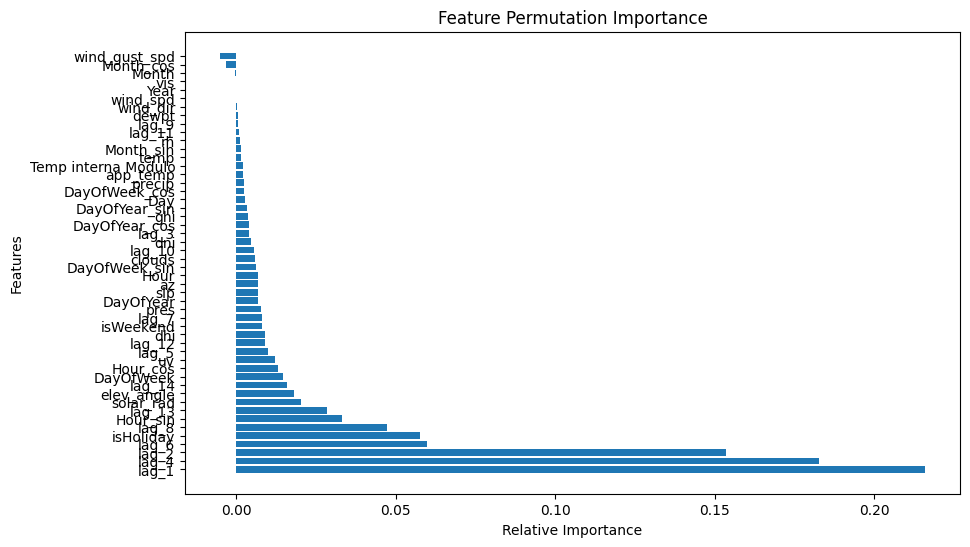

In [ ]:
from random import shuffle
def permutation_feature_importance(model, X_test, y_test, feature_names):
    y_pred = model.predict(X_test)
    #rmse_ref = root_mean_squared_error(y_test.flatten(), y_pred.flatten())
    mae_ref = mean_absolute_error(y_test, y_pred)

    feature_importance = np.zeros(X_test.shape[1])

    for i in tqdm(range(X_test.shape[1]), total=(X_test.shape[1])):
        #Make a Copy of the Test Subset and Permute its values
        X_test_permuted = X_test.copy()
        X_test_permuted[:, i] = shuffle(X_test_permuted[:, i])

        #Calculate the metrics
        y_pred_permuted = model.predict(X_test_permuted)
        #rmse_permuted = root_mean_squared_error(y_test.flatten(), y_pred_permuted.flatten())
        mae_permuted = mean_absolute_error(y_test, y_pred_permuted)

        #Calculate the difference in the metrics
        feature_importance[i] = mae_ref - mae_permuted
    
    #Normalize feature importances
    feature_importance /= feature_importance.sum()

    #Sort indexes
    sorted_indexes = feature_importance.argsort()[::-1]
    sorted_importances = feature_importance[sorted_indexes]
    sorted_importances_names = feature_names[sorted_indexes]

    #Bar Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_importances)), sorted_importances, align='center')
    plt.yticks(range(len(sorted_importances)), sorted_importances_names)
    plt.xlabel('Relative Importance')
    plt.ylabel('Features')
    plt.title('Feature Permutation Importance')
    plt.show()
permutation_feature_importance(regressorXGBR, X_test.to_numpy(), y_test.to_numpy(), np.array(col_names))